In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Step 2: Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import numpy as np
import matplotlib.pyplot as plt

1/1 [==============================] - 0s 135ms/step


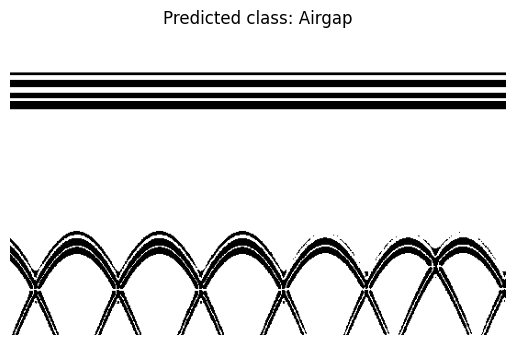

In [ ]:
# Define class names
class_names = {
    0: 'Airgap',  # Replace 'ClassName1' with the actual name of class 0
    1: 'NoAirgap'   # Replace 'ClassName2' with the actual name of class 1
}

# Step 3: Load the .h5 model
model_path = '/content/drive/MyDrive/KumpulanModel/Eksperimen1CNN.h5'  # Update this path
model = tf.keras.models.load_model(model_path)

# Step 4: Load and preprocess the image
image_path = '/content/drive/MyDrive/KeperluanTA/testout/noairgap/data_1601.png'  # Update this path
img = image.load_img(image_path, color_mode='grayscale', target_size=(330, 540))
img_array = image.img_to_array(img)
img_array /= 255.0  # Normalize the image to the range [0, 1] since it's binarized
img_array_expanded_dims = np.expand_dims(img_array, axis=0)

# Step 5: Perform image classification
prediction = model.predict(img_array_expanded_dims)
predicted_class = np.argmax(prediction, axis=1)  # Assuming a multi-class classification model
predicted_class_name = class_names[predicted_class[0]]

# Step 6: Display the results
plt.imshow(img, cmap='gray')  # Ensure the image is displayed as grayscale
plt.title(f'Predicted class: {predicted_class_name}')  # Display the name of the predicted class
plt.axis('off')
plt.show()